#### References:
https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://towardsdatascience.com/kafka-python-explained-in-10-lines-of-code-800e3e07dad1

In [1]:
pip install kafka-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from time import sleep
from json import dumps
from kafka import KafkaProducer
import requests
import time
import threading

from kafka import KafkaConsumer
from json import loads

In [3]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))


In [4]:
def producerMethod():
    end_time = time.time() + 60 * 60
    while time.time()<end_time:
        res=requests.get("http://api.open-notify.org/iss-now.json").text
        producer.send('numtest',res)
x=threading.Thread(target=producerMethod)
x.start()

In [5]:
consumer = KafkaConsumer(
    'numtest',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest', consumer_timeout_ms = 7000,
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))


In [6]:
# for message in consumer:
#     print(message.value)

In [7]:
coordinates = []
for message in consumer:
    data  = loads(message.value)
    coordinates.append(data.get('iss_position'))
print(coordinates)

[{'latitude': '-9.5493', 'longitude': '79.7808'}, {'latitude': '-9.5493', 'longitude': '79.7808'}, {'latitude': '-9.5744', 'longitude': '79.7993'}, {'latitude': '-9.5744', 'longitude': '79.7993'}, {'latitude': '-9.5744', 'longitude': '79.7993'}, {'latitude': '-9.5995', 'longitude': '79.8179'}, {'latitude': '-9.5995', 'longitude': '79.8179'}, {'latitude': '-9.5995', 'longitude': '79.8179'}, {'latitude': '-9.6246', 'longitude': '79.8364'}, {'latitude': '-9.6246', 'longitude': '79.8364'}, {'latitude': '-9.6497', 'longitude': '79.8549'}, {'latitude': '-9.6497', 'longitude': '79.8549'}, {'latitude': '49.7546', 'longitude': '-14.9648'}, {'latitude': '49.7546', 'longitude': '-14.9648'}, {'latitude': '49.7456', 'longitude': '-14.9187'}, {'latitude': '49.7366', 'longitude': '-14.8725'}, {'latitude': '49.7366', 'longitude': '-14.8725'}, {'latitude': '49.7276', 'longitude': '-14.8264'}, {'latitude': '49.7276', 'longitude': '-14.8264'}, {'latitude': '49.7276', 'longitude': '-14.8264'}, {'latitude'

In [8]:
import pandas as pd
df = pd.DataFrame(coordinates)
df

,latitude,longitude
0,-9.5493,79.7808
1,-9.5493,79.7808
2,-9.5744,79.7993
3,-9.5744,79.7993
4,-9.5744,79.7993
...,...,...
16550,-18.9552,-156.6654
16551,-18.9308,-156.6451
16552,-18.9308,-156.6451
16553,-18.9064,-156.6248


In [9]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

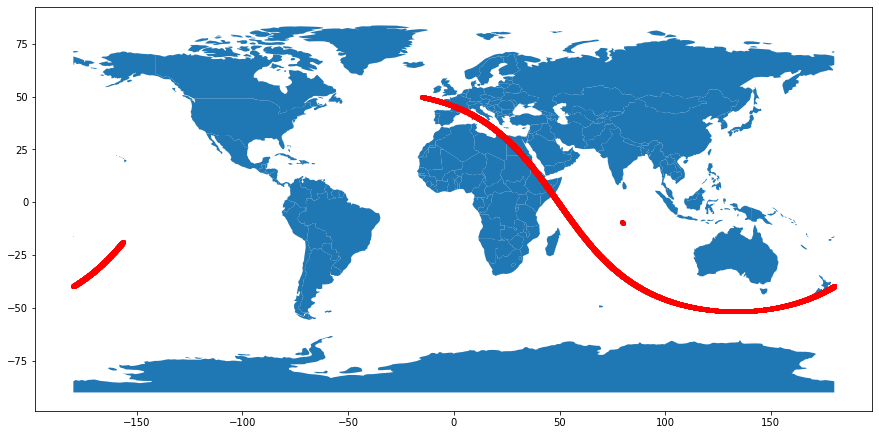

In [12]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

In [13]:
# pip install python-dotenv

In [14]:
# from json import dumps
# from kafka import KafkaProducer
# import requests
# import time
# import os 
# import csv

# from dotenv import load_dotenv
# from kafka import KafkaConsumer
# from json import loads

# load_dotenv('.env')

# key=os.getenv('API_KEY')
# producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
#                          value_serializer=lambda x: 
#                          dumps(x).encode('utf-8'))
# key=os.getenv('API_KEY')
# url='http://api.open-notify.org/iss-now.json'

# with requests.Session() as s:
#     download = s.get(url)
#     content = download.content.decode('utf-8')
#     cr=csv.reader(content.splitlines(), delimiter=',')
#     mylist=list(cr)
#     for row in mylist:
#         producer.send('testtopic',row)

In [15]:
# consumer = KafkaConsumer(
#     'testtopic',
#      bootstrap_servers=['localhost:9092'],
#      auto_offset_reset='earliest',
#      enable_auto_commit=True,
#      group_id='my-group',
#      value_deserializer=lambda x: loads(x.decode('utf-8')))

In [16]:
# for message in consumer:
#     print(message.value)